In [6]:
# You must not modify this chunk of code at all!
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import time

# You must not modify the Environment class
class Environment:

  DIRTY = 1
  CLEAN = 2
  BLOCKED = 3
  VISITED = 4

  # You must not modify the constructor
  def __init__(self, nRows, nCols, seed):
    np.random.seed(seed)
    self.__environment = np.random.randint(4, size = (nRows, nCols))
    self.__x = 0
    self.__y = 0
    self.__nRows = nRows
    self.__nCols = nCols
    self.__stateID = -1
    self.__environment[0, 0] = Environment.CLEAN
    self.__updateState()
    self.__plot()

  # You must not modify the __plot function
  def __plot(self):
    print("State " + str(self.__stateID))
    self.__stateID += 1
    fig, ax = plt.subplots()
    ax.set_xlim(0, self.__nCols)
    ax.set_ylim(0, self.__nRows)
    for x in range(self.__nCols + 1):
      ax.axvline(x, color = "black", linestyle = "-", linewidth = 1)
    for y in range(self.__nRows + 1):
      ax.axhline(y, color = "black", linestyle = "-", linewidth = 1)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.text(self.__x + 0.5, self.__y + 0.5, "X", ha = "center", va = "center", fontsize = 30, color = "blue")
    for j in range(self.__nRows):
      for i in range(self.__nCols):
        match self.__environment[j, i]:
          case Environment.DIRTY:
            rect = patches.Rectangle((i, j), 1, 1, linewidth = 0, edgecolor = "none", facecolor = "lightgrey")
            ax.add_patch(rect)
          case Environment.BLOCKED:
            rect = patches.Rectangle((i, j), 1, 1, linewidth = 0, edgecolor = "none", facecolor = "black")
            ax.add_patch(rect)
          case Environment.VISITED:
            rect = patches.Rectangle((i, j), 1, 1, linewidth = 0, edgecolor = "none", facecolor = "lightgreen")
            ax.add_patch(rect)
    plt.show()

  # You must not modify the __updateState function
  def __updateState(self):
    self.__dirt = (self.__environment[self.__y, self.__x] == Environment.DIRTY)
    self.__obstacleLeft = not (self.__x - 1 >= 0 and self.__environment[self.__y, self.__x - 1] != Environment.BLOCKED)
    self.__obstacleRight = not (self.__x + 1 < self.__nCols and self.__environment[self.__y, self.__x + 1] != Environment.BLOCKED)
    self.__obstacleDown = not (self.__y - 1 >= 0 and self.__environment[self.__y - 1, self.__x] != Environment.BLOCKED)
    self.__obstacleUp = not (self.__y + 1 < self.__nRows and self.__environment[self.__y + 1, self.__x] != Environment.BLOCKED)

  # You must not modify the getState function
  def getState(self):
    self.__updateState()
    return {"dirt" : self.__dirt, "obstacleLeft": self.__obstacleLeft, "obstacleRight": self.__obstacleRight, "obstacleUp": self.__obstacleUp, "obstacleDown": self.__obstacleDown}

  # You must not modify the run function
  def run(self, action):
    x = self.__x
    y = self.__y
    match action:
      case "clean":
        if self.__environment[self.__y, self.__x] == Environment.DIRTY:
          self.__environment[y, x] = Environment.CLEAN
      case "left":
        if not self.__obstacleLeft:
          self.__x = self.__x - 1
      case "right":
        if not self.__obstacleRight:
          self.__x = self.__x + 1
      case "up":
        if not self.__obstacleUp:
          self.__y = self.__y + 1
      case "down":
        if not self.__obstacleDown:
          self.__y = self.__y - 1
      case _:
        None
    self.__environment[y, x] = Environment.VISITED
    self.__plot()

  # You must not modify the evaluate function
  def evaluate(self):
    sum = 0
    for j in range(self.__nRows):
      for i in range(self.__nCols):
        if self.__environment[j, i] == Environment.DIRTY:
          sum = sum + 1
    return self.__stateID, sum / (self.__nRows * self.__nCols)


In [13]:
class Agent:

    def __init__(self, seed):
        self.visited = set()
        self.moves = []
        self.backtrack = []
        self.x, self.y = 0, 0  # Track the agent's position
        random.seed(seed)

    def __perceive(self, environment):
        return environment.getState()

    def __think(self, percepts):
        self.visited.add((self.x, self.y))

        if percepts["dirt"]:
            return "clean"

        neighbors = []

        if not percepts["obstacleUp"] and (self.x, self.y + 1) not in self.visited:
            neighbors.append(("up", (self.x, self.y + 1)))
        if not percepts["obstacleRight"] and (self.x + 1, self.y) not in self.visited:
            neighbors.append(("right", (self.x + 1, self.y)))
        if not percepts["obstacleDown"] and (self.x, self.y - 1) not in self.visited:
            neighbors.append(("down", (self.x, self.y - 1)))
        if not percepts["obstacleLeft"] and (self.x - 1, self.y) not in self.visited:
            neighbors.append(("left", (self.x - 1, self.y)))

        if neighbors:
            direction, (new_x, new_y) = neighbors[0]
            self.moves.append(direction)  # Store the direction instead of position
            self.backtrack.append((self.x, self.y))
            self.x, self.y = new_x, new_y
            return direction
        else:
            if self.backtrack:
                last_position = self.backtrack.pop()
                reverse_direction = self._reverse_direction(self.moves.pop())
                self.x, self.y = last_position
                return reverse_direction
            else:
                return "stop"

    def _reverse_direction(self, direction):
        return {
            "up": "down",
            "down": "up",
            "left": "right",
            "right": "left"
        }[direction]

    def start(self, environment, maxSteps):
        for _ in range(maxSteps):
            percepts = self.__perceive(environment)
            action = self.__think(percepts)
            print("Action = " + action + "\n")
            if action == "stop":
                break
            environment.run(action)


State -1


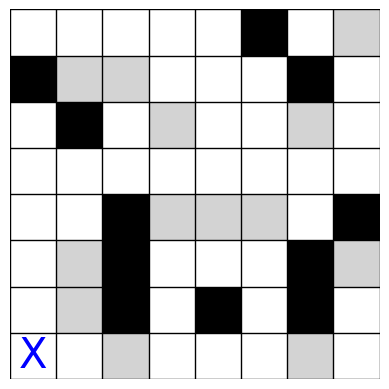

Action = up

State 0


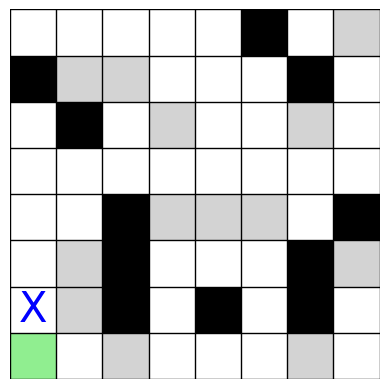

Action = up

State 1


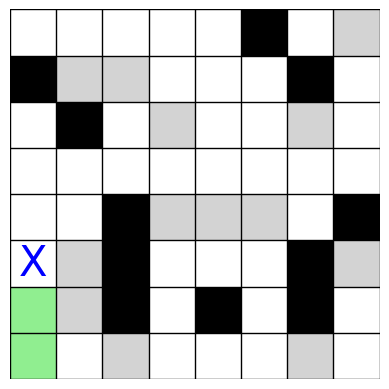

Action = up

State 2


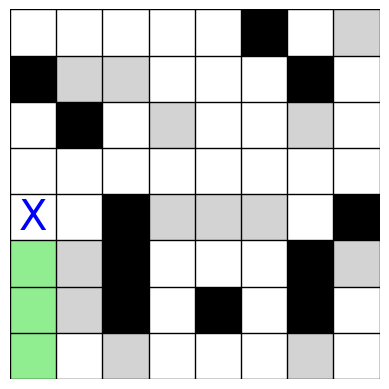

Action = up

State 3


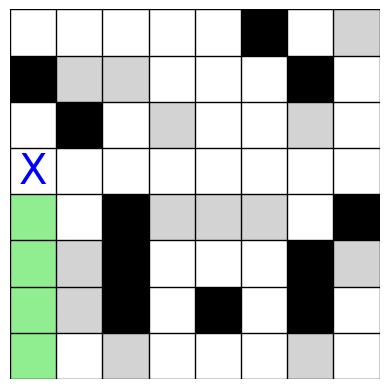

Action = up

State 4


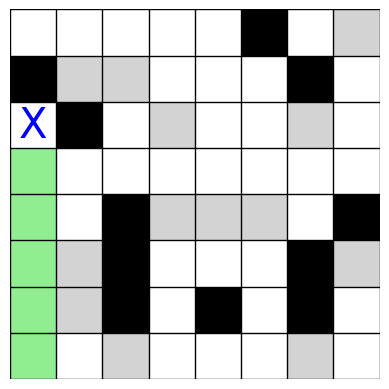

Action = down

State 5


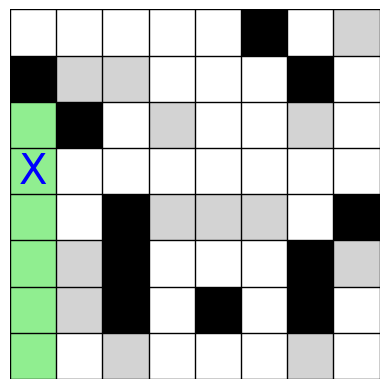

Action = right

State 6


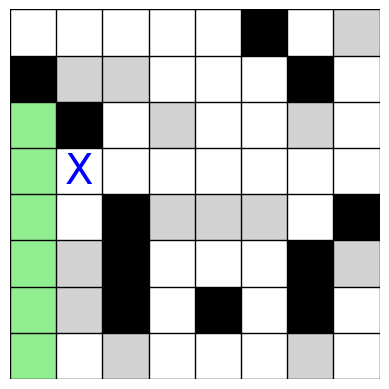

Action = right

State 7


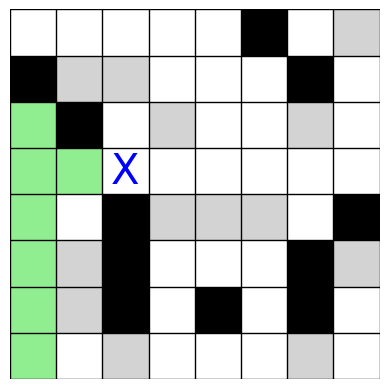

Action = up

State 8


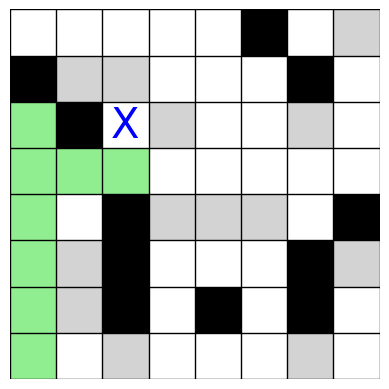

Action = up

State 9


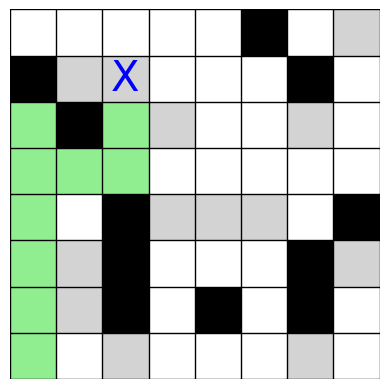

Action = clean

State 10


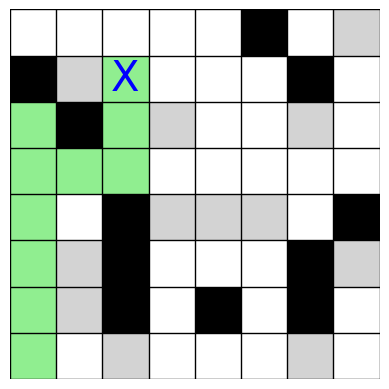

Action = up

State 11


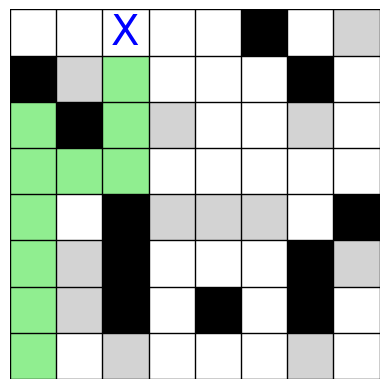

Action = right

State 12


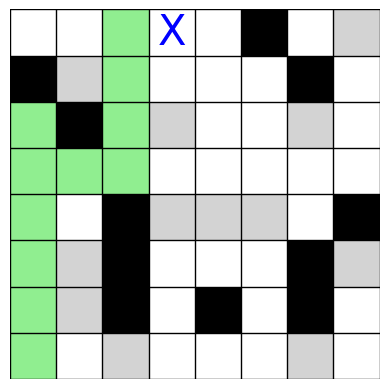

Action = right

State 13


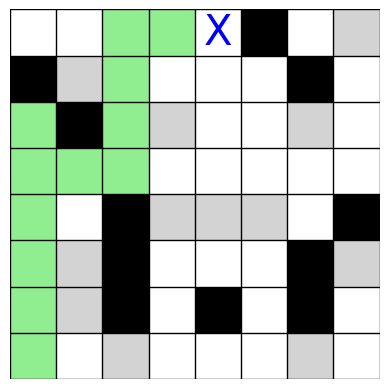

Action = down

State 14


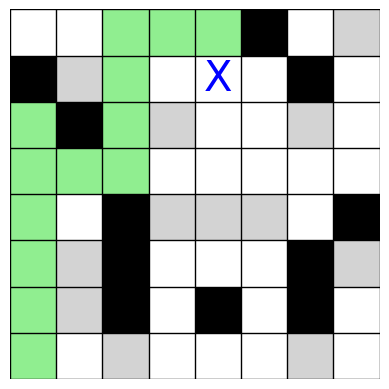

Action = right

State 15


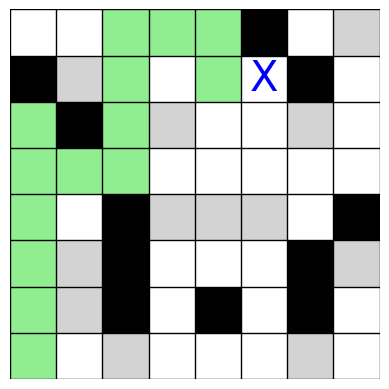

Action = down

State 16


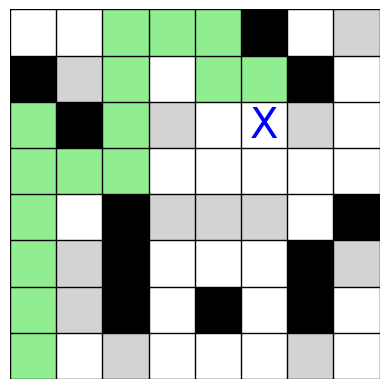

Action = right

State 17


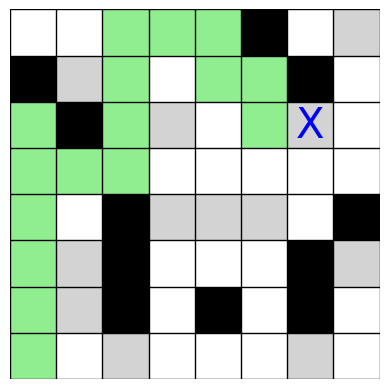

Action = clean

State 18


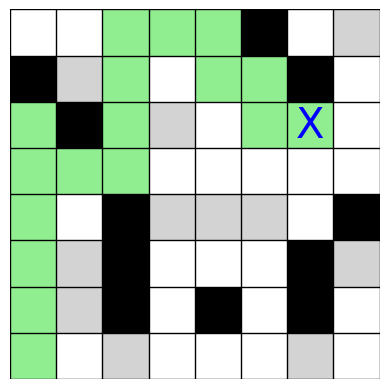

Action = right

State 19


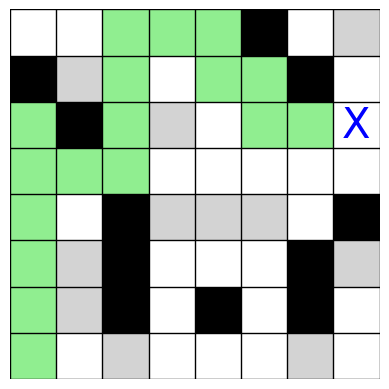

Action = up

State 20


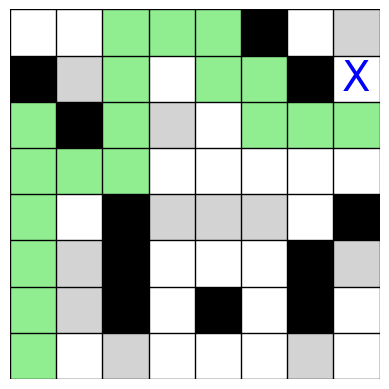

Action = up

State 21


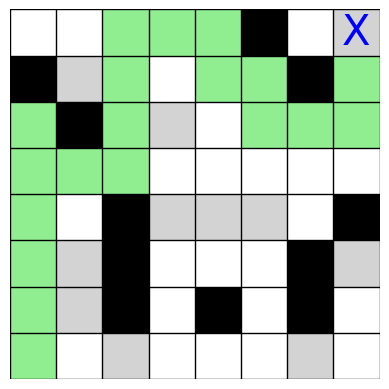

Action = clean

State 22


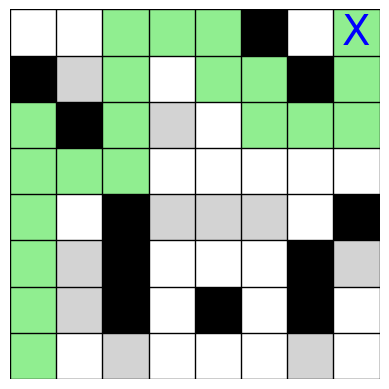

Action = left

State 23


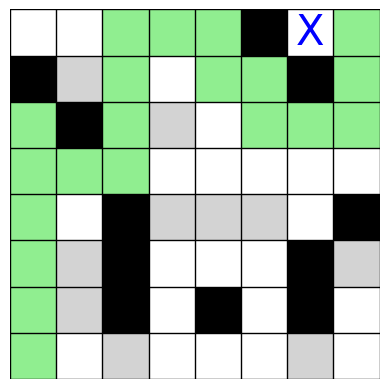

Action = right

State 24


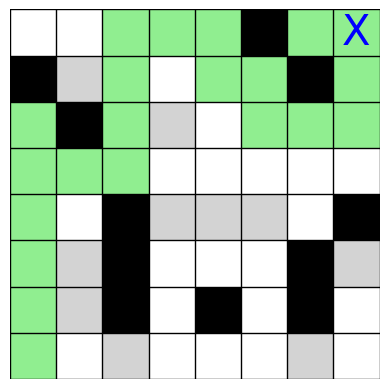

Action = down

State 25


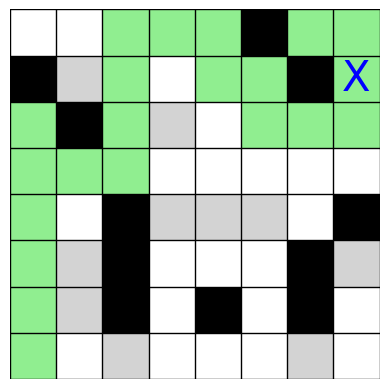

Action = down

State 26


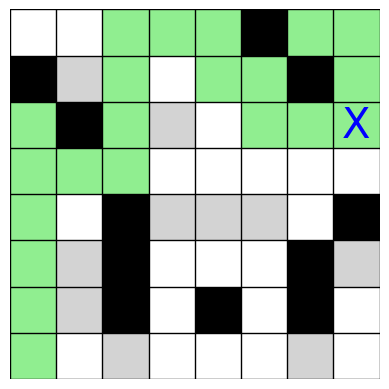

Action = down

State 27


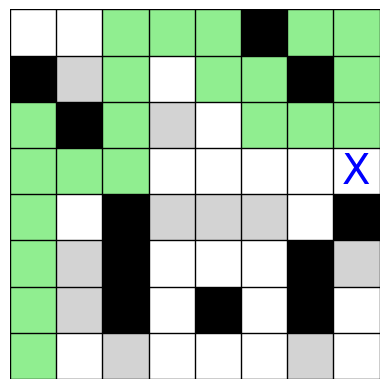

Action = left

State 28


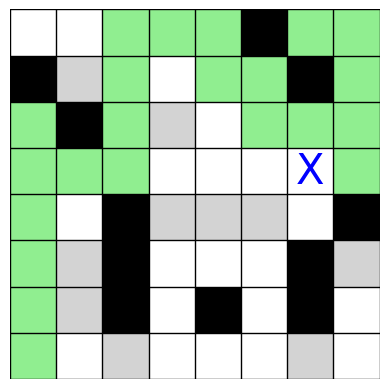

Action = down

State 29


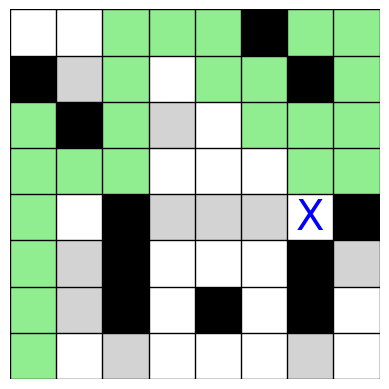

Action = left

State 30


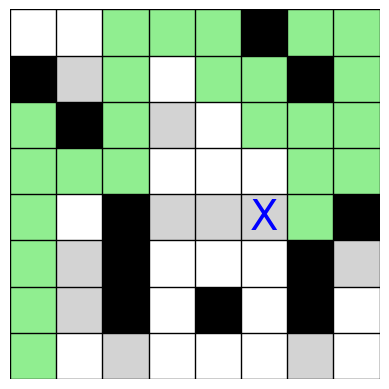

Action = clean

State 31


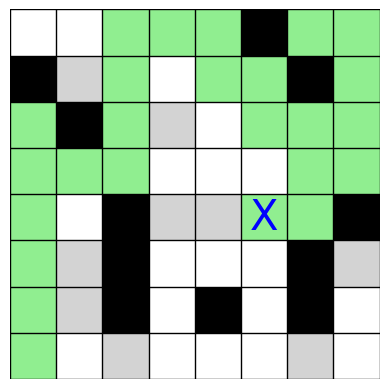

Action = up

State 32


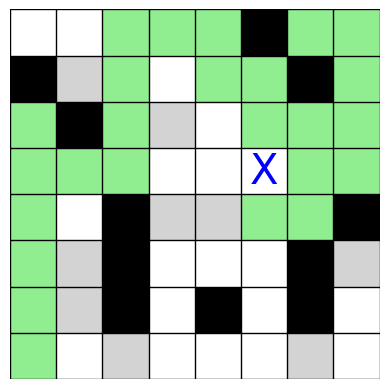

Action = left

State 33


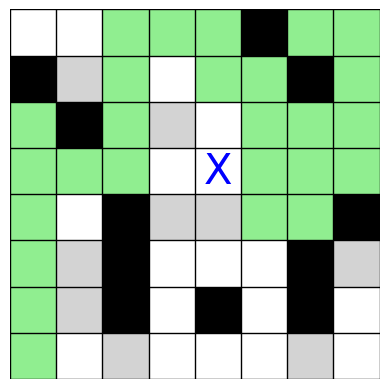

Action = up

State 34


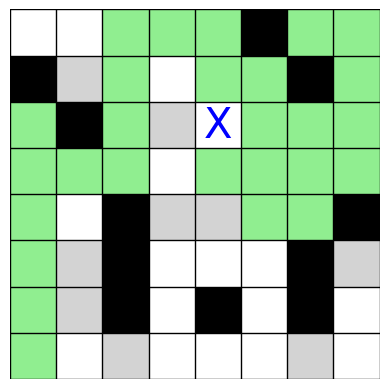

Action = left

State 35


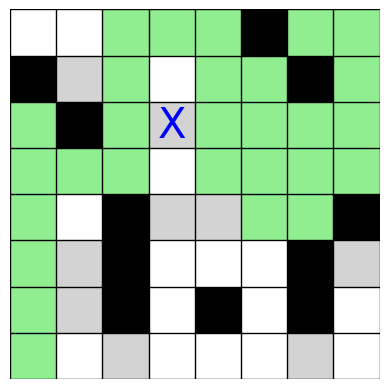

Action = clean

State 36


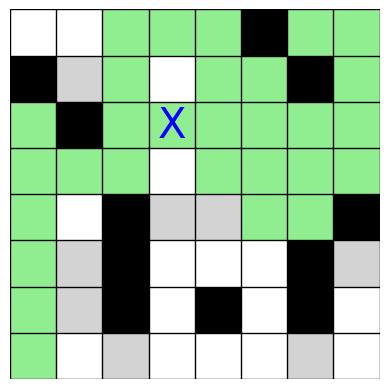

Action = up

State 37


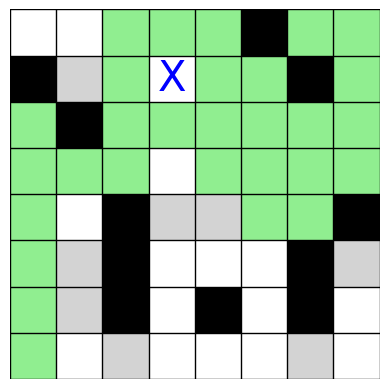

Action = down

State 38


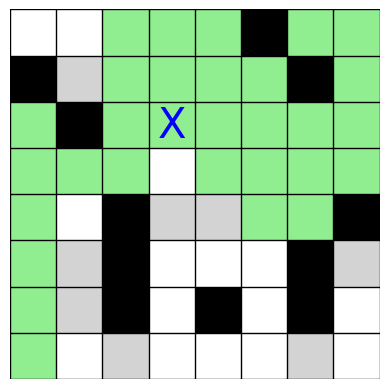

Action = down

State 39


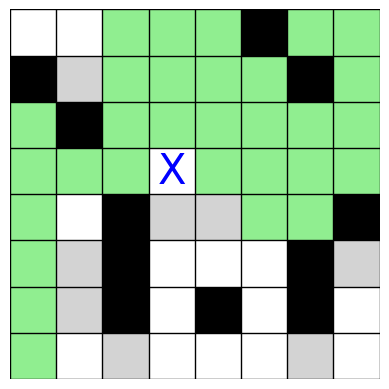

Action = down

State 40


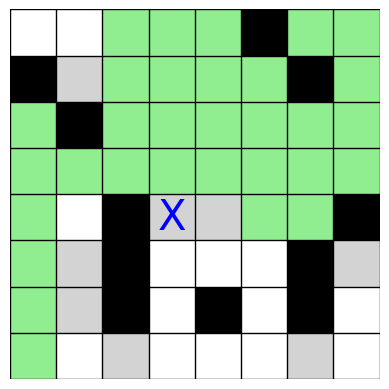

Action = clean

State 41


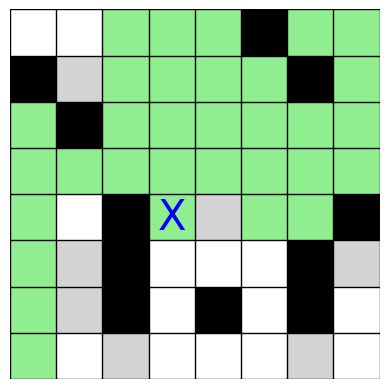

Action = right

State 42


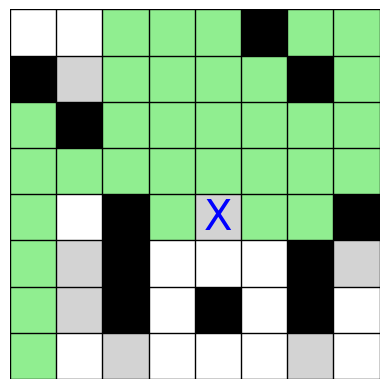

Action = clean

State 43


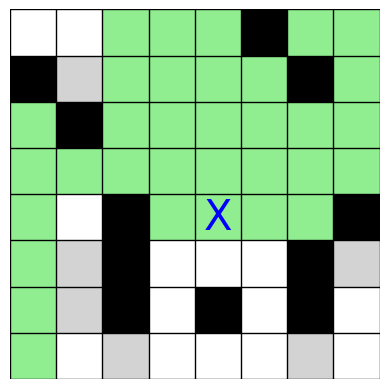

Action = down

State 44


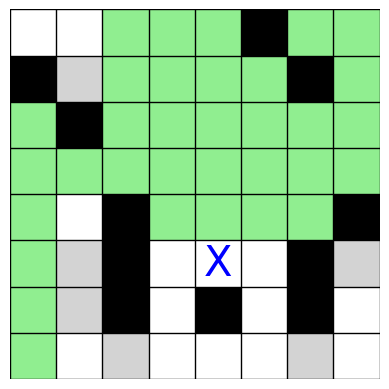

Action = right

State 45


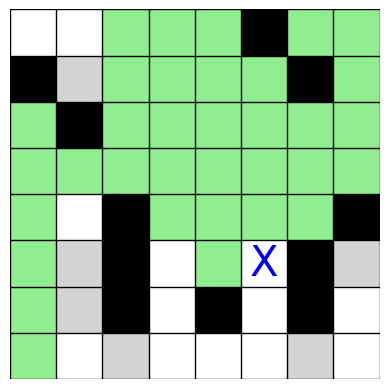

Action = down

State 46


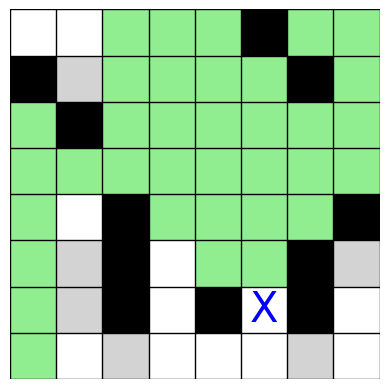

Action = down

State 47


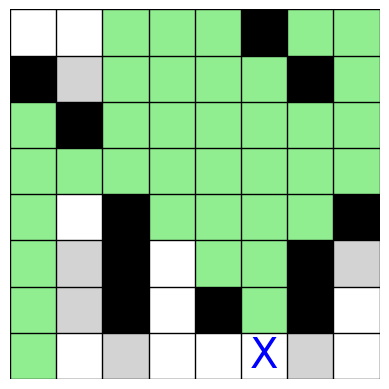

Action = right

State 48


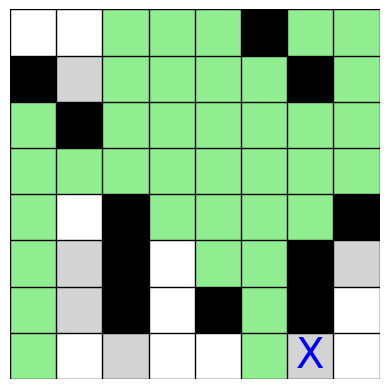

Action = clean

State 49


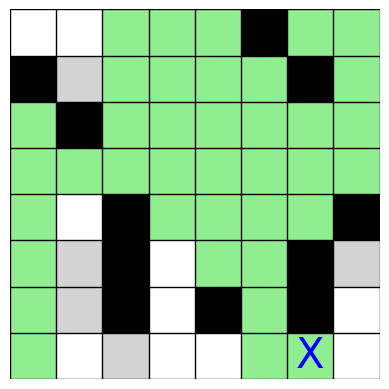

Action = right

State 50


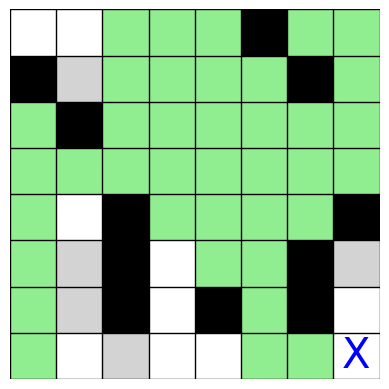

Action = up

State 51


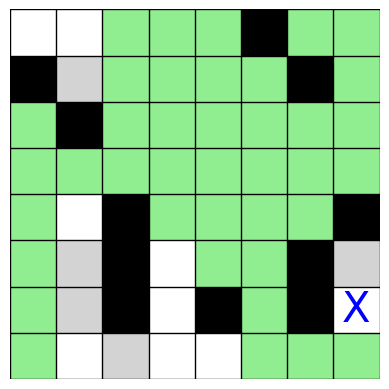

Action = up

State 52


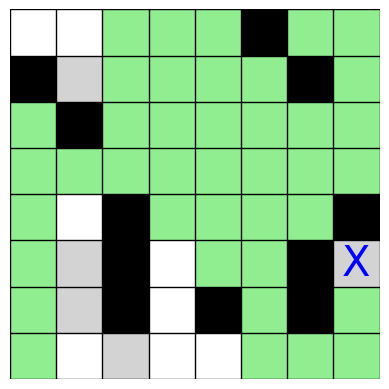

Action = clean

State 53


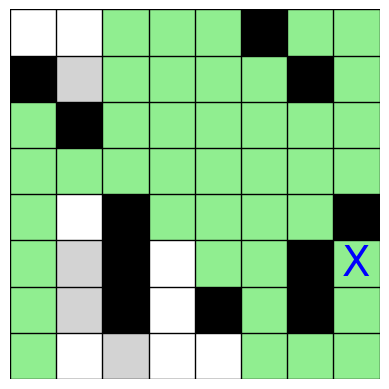

Action = down

State 54


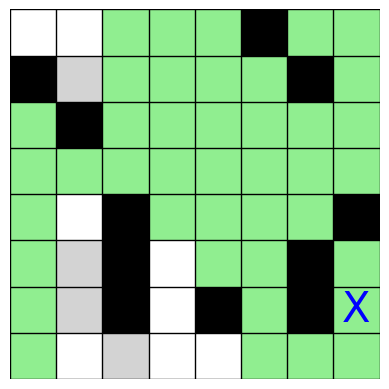

Action = down

State 55


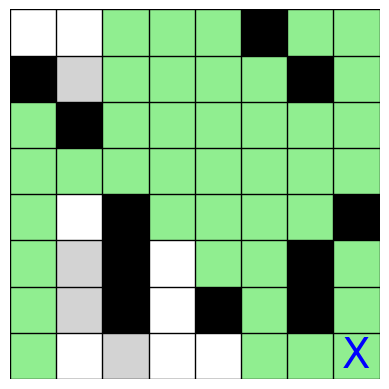

Action = left

State 56


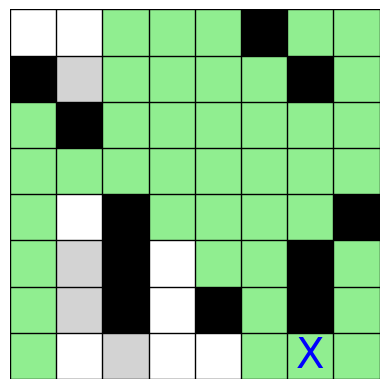

Action = left

State 57


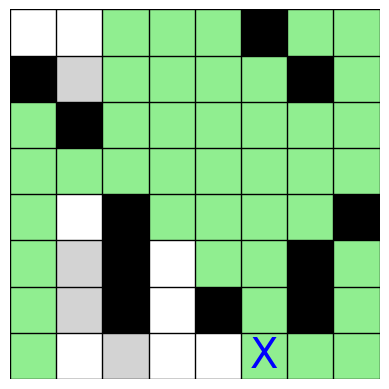

Action = left

State 58


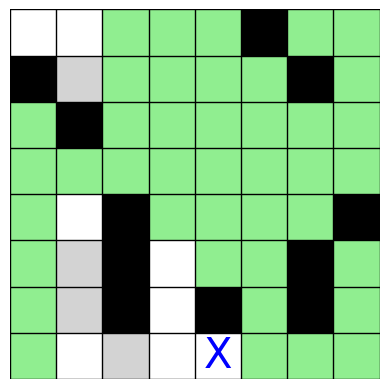

Action = left

State 59


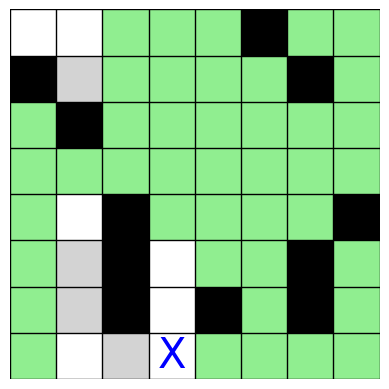

Action = up

State 60


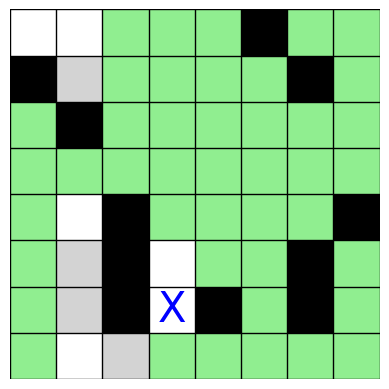

Action = up

State 61


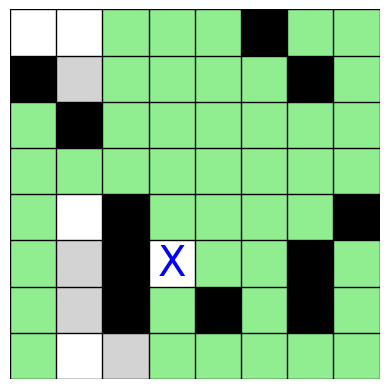

Action = down

State 62


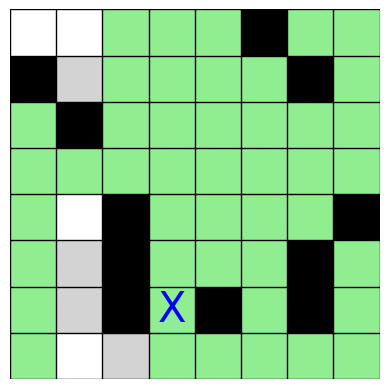

Action = down

State 63


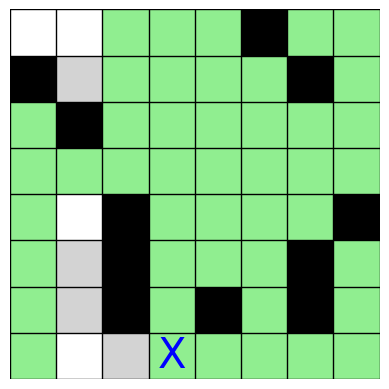

Action = left

State 64


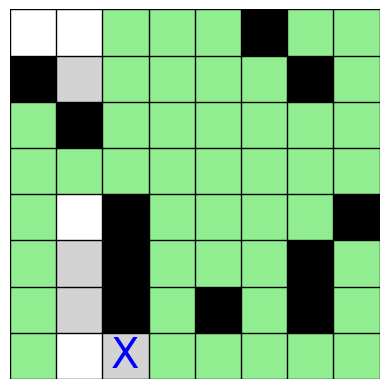

Action = clean

State 65


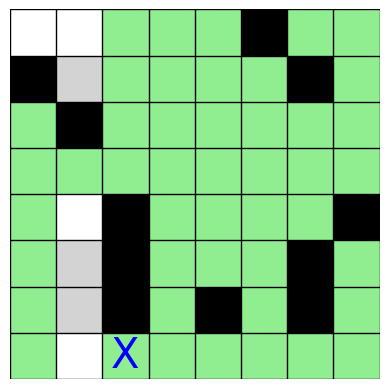

Action = left

State 66


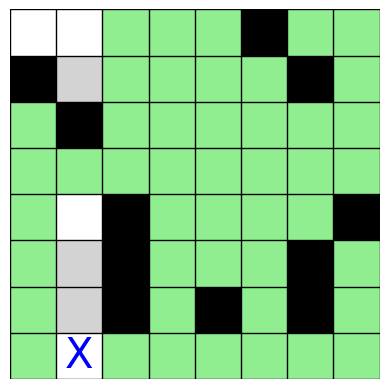

Action = up

State 67


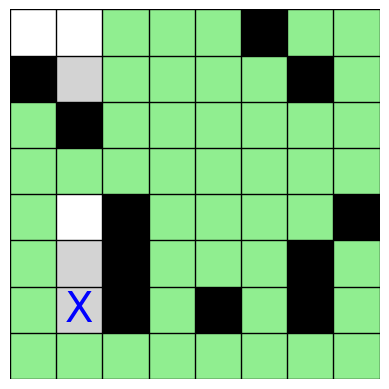

Action = clean

State 68


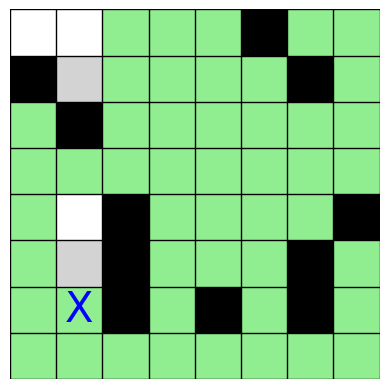

Action = up

State 69


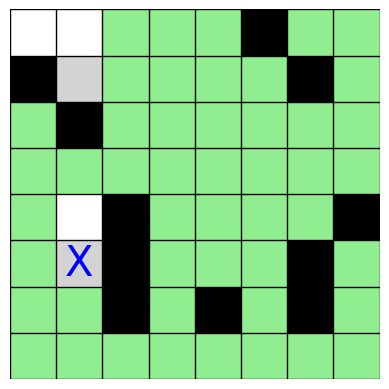

Action = clean

State 70


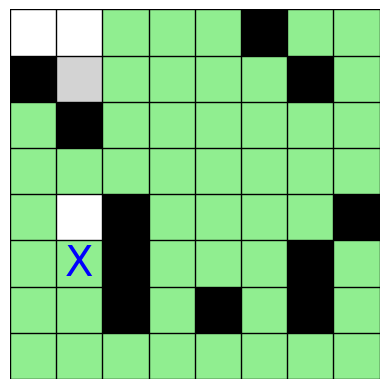

Action = up

State 71


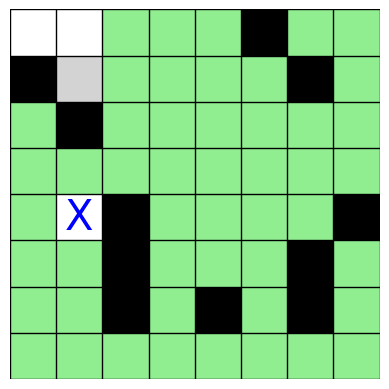

Action = down

State 72


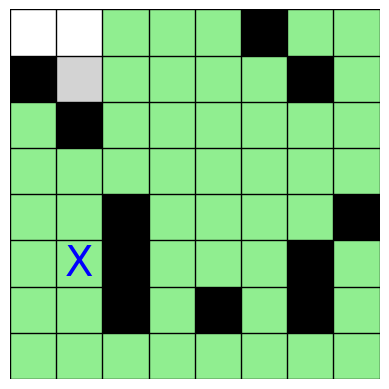

Action = down

State 73


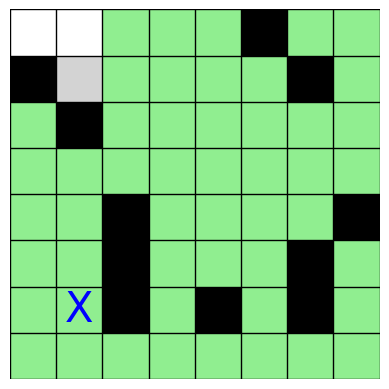

Action = down

State 74


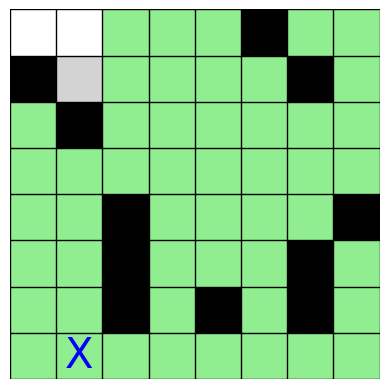

Action = right

State 75


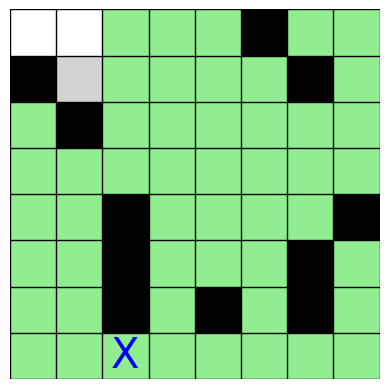

Action = right

State 76


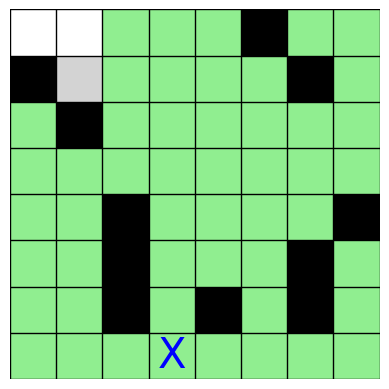

Action = right

State 77


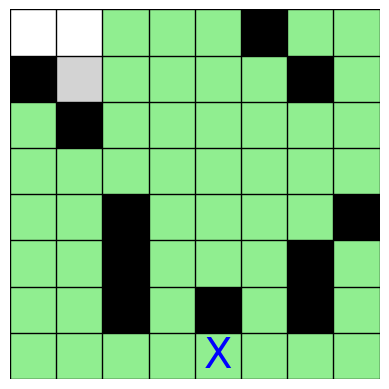

Action = right

State 78


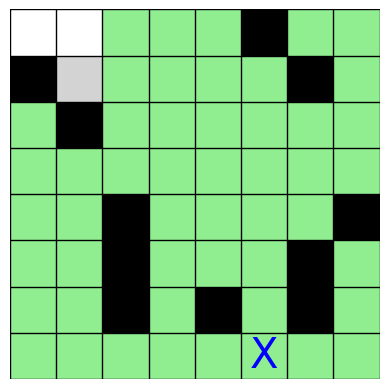

Action = up

State 79


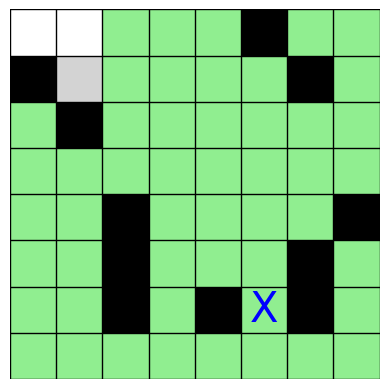

Action = up

State 80


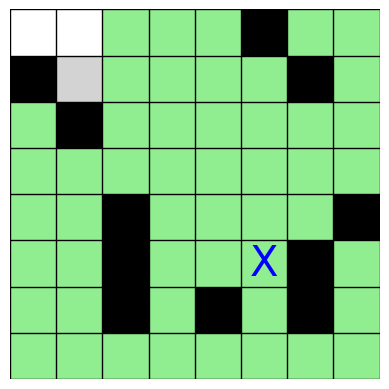

Action = left

State 81


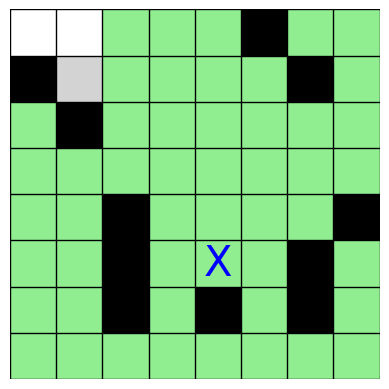

Action = up

State 82


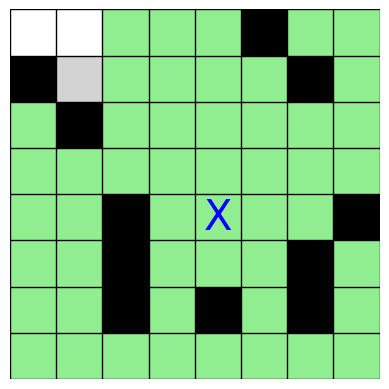

Action = left

State 83


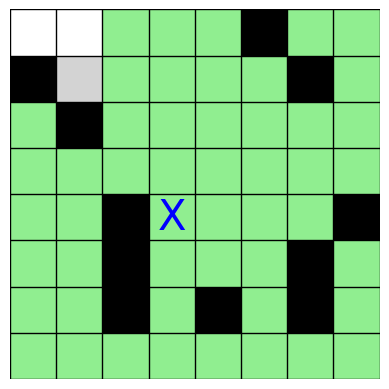

Action = up

State 84


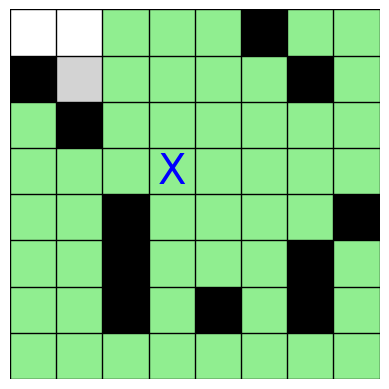

Action = up

State 85


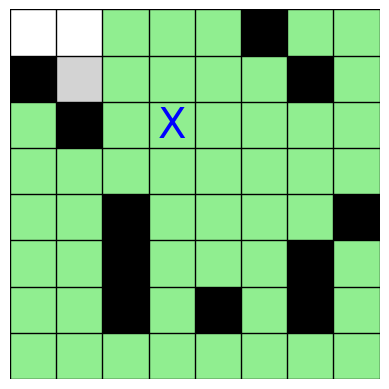

Action = right

State 86


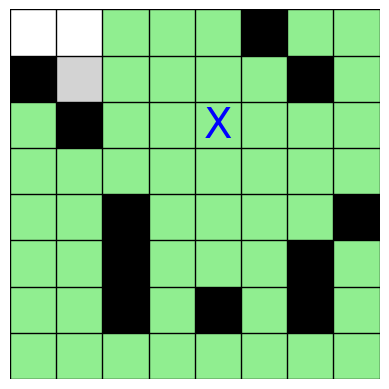

Action = down

State 87


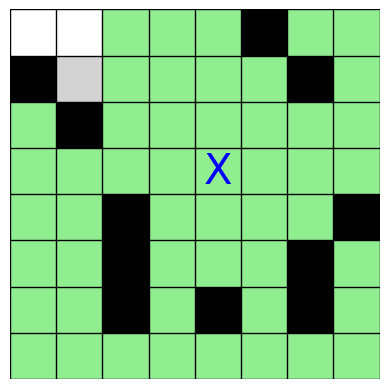

Action = right

State 88


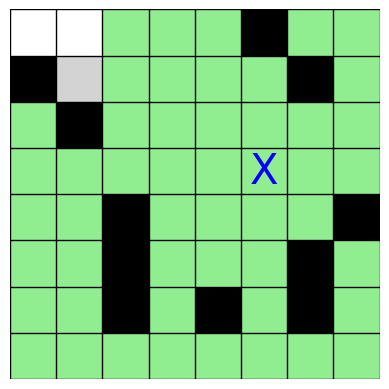

Action = down

State 89


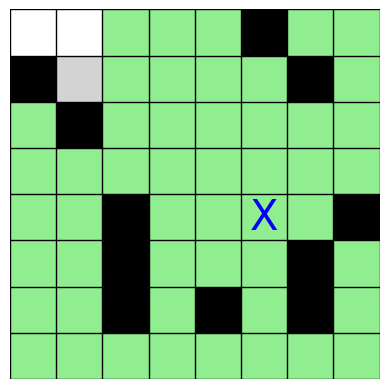

Action = right

State 90


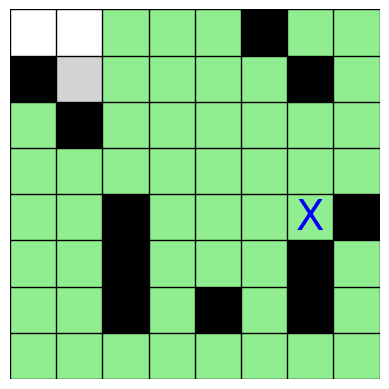

Action = up

State 91


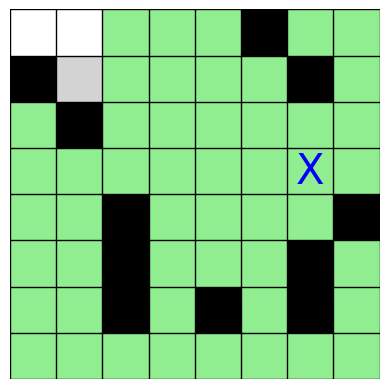

Action = right

State 92


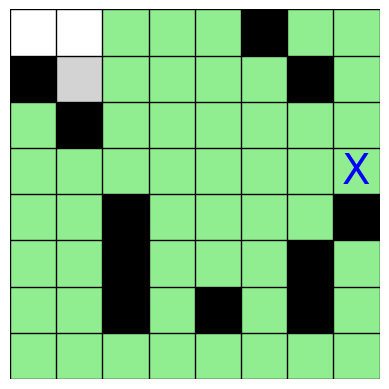

Action = up

State 93


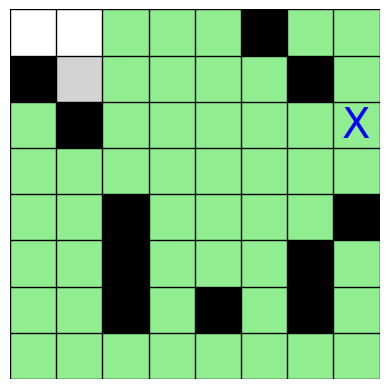

Action = left

State 94


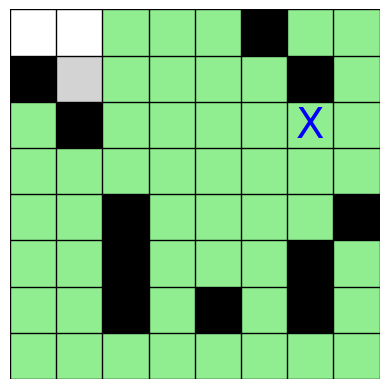

Action = left

State 95


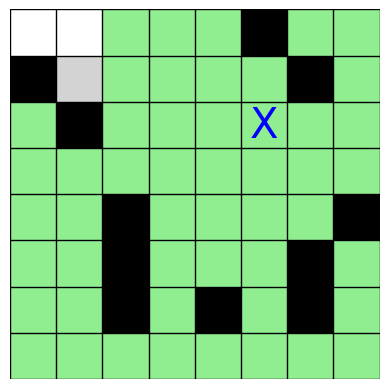

Action = up

State 96


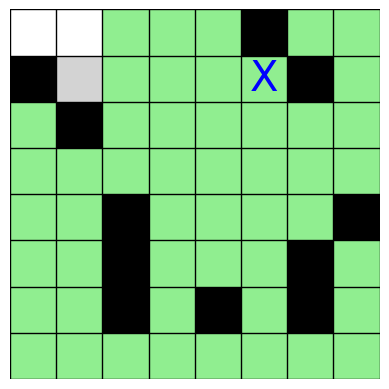

Action = left

State 97


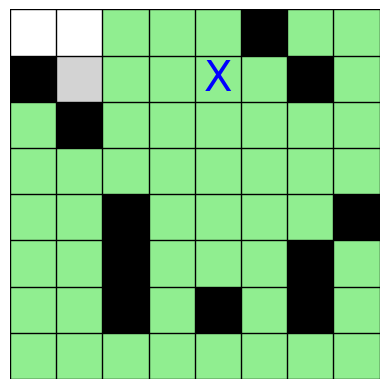

Action = up

State 98


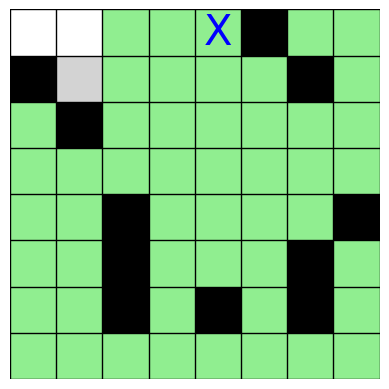

Action = left

State 99


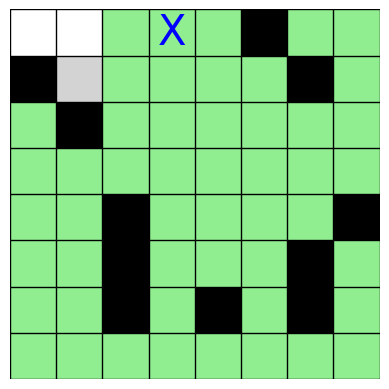

Action = left

State 100


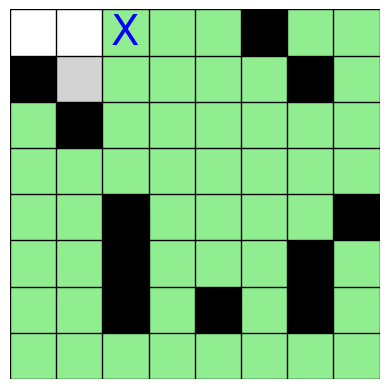

Action = left

State 101


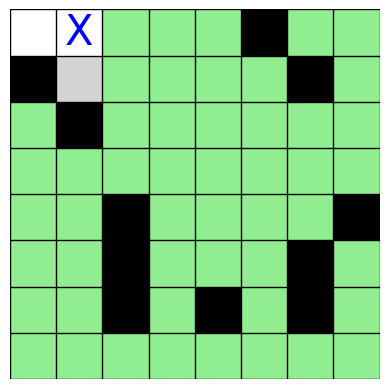

Action = down

State 102


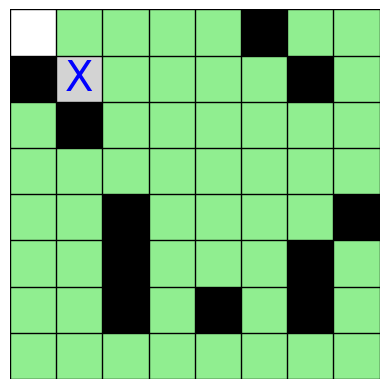

Action = clean

State 103


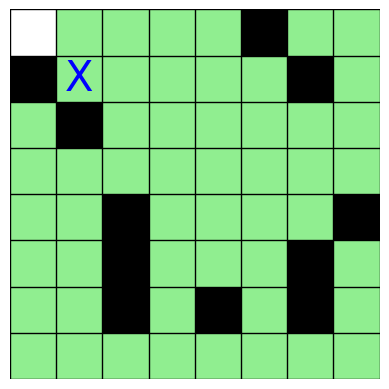

Action = up

State 104


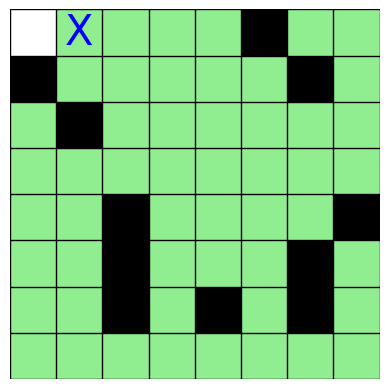

Action = left

State 105


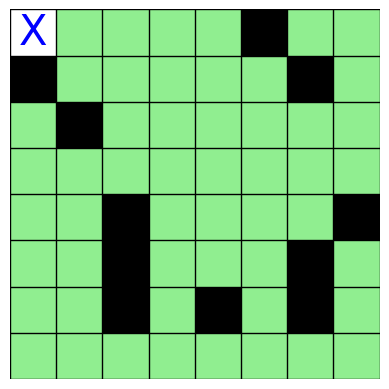

Action = right

State 106


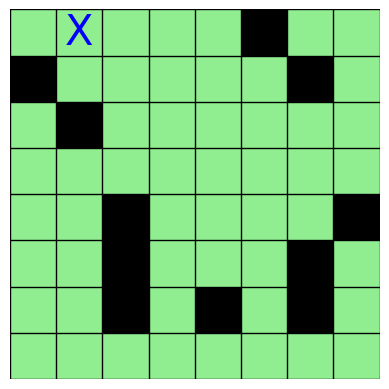

Action = right

State 107


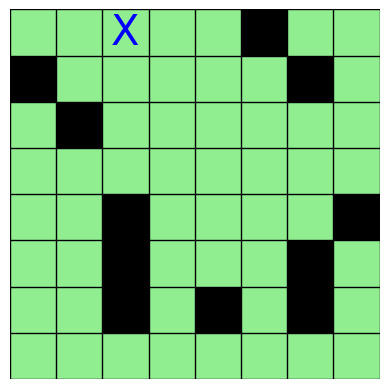

Action = down

State 108


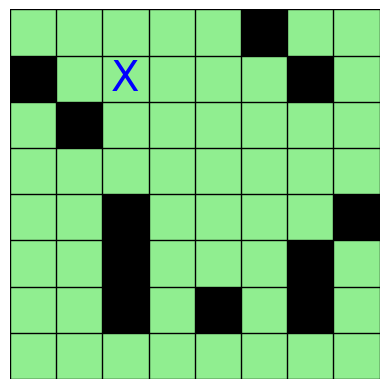

Action = down

State 109


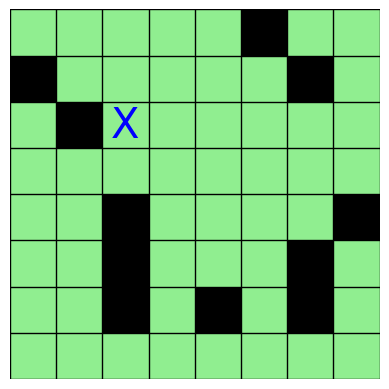

Action = down

State 110


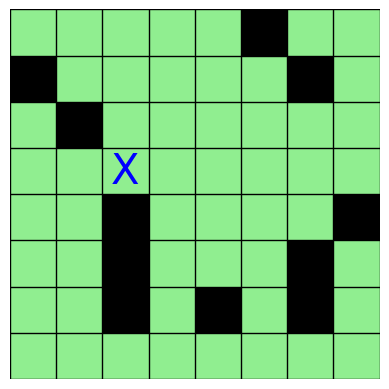

Action = left

State 111


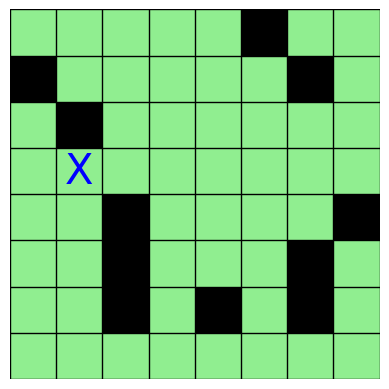

Action = left

State 112


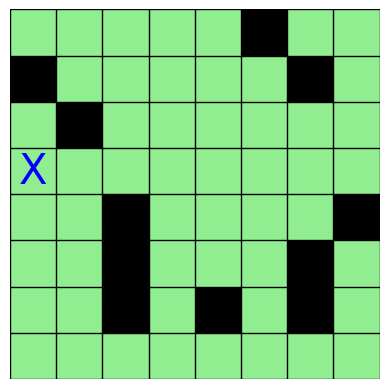

Action = down

State 113


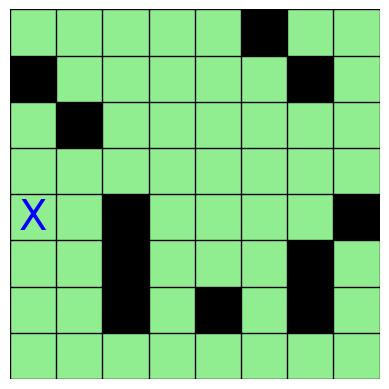

Action = down

State 114


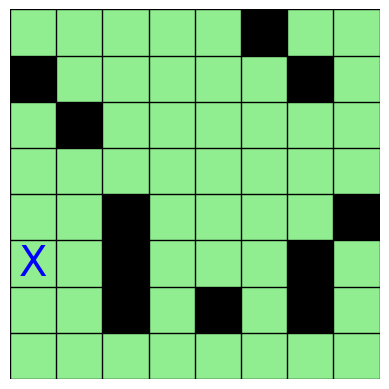

Action = down

State 115


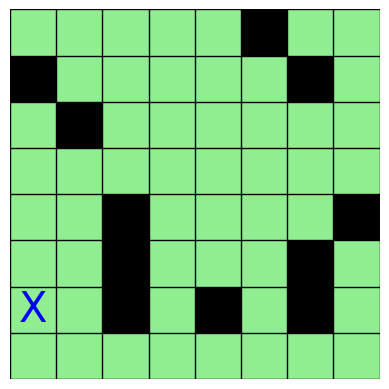

Action = down

State 116


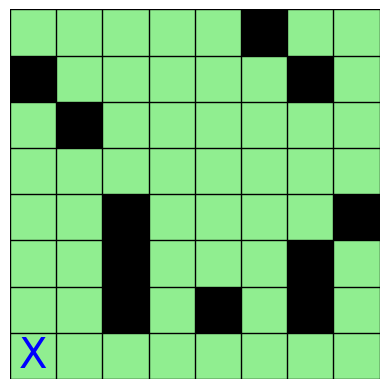

Action = stop

Dirt percentage (%): 0.0
Steps taken: 117


In [15]:
# environment = Environment(5, 5, 4321)
environment = Environment(8, 8, 666)
# environment = Environment(4, 12, 911)
# environment = Environment(6, 6, 42)
# environment = Environment(7, 10, 3141592)
agent = Agent(567)
agent.start(environment, 500) # You can adjust the maximum number of steps. This is just a safety condition.
steps, dirt = environment.evaluate()
print("Dirt percentage (%): " + str(round(dirt * 100, 2)))
print("Steps taken: " + str(steps))